In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as st
import seaborn as sns

import pingouin as pg
import hyppo as hp

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

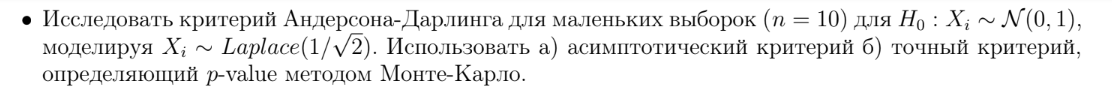

In [5]:
#Генерация квантилей exp, Anderson
def anderson_value(sample, n):
    sample = np.array(sample)
    sample = np.sort(sample)
    
    ans = -n
    for i in range(1, n+1):
        ans -= ((2*i-1)/n*(
            np.log(st.norm.cdf(sample[i-1])) + np.log(1 - st.norm.cdf(sample[n-i]))
        ))
    
    return ans

#сгенерируем таблицу приближенных квантиелей
f = open('anderson.txt', 'w')

table = []
for i in range(1000):
    sample = sc.stats.norm.rvs(size=10)
    val = anderson_value(sample, 10)
    table.append(val)
    
table = np.array(table)
table = np.sort(table)

for i in range(len(table)):
    print(table[i])
    f.write(str(table[i]) + ' ')
    
f.close()

0.15630619315523314
0.16616773501093252
0.17845453329779337
0.1832961816740633
0.1835050997252577
0.18646876866787476
0.1872382691864844
0.18820416010381447
0.19013718516392827
0.19250737439297427
0.19290601671485125
0.2107018151858044
0.2109805440073551
0.21456123762403911
0.21764623590522925
0.21983512313041542
0.22103068084619631
0.22271654194190024
0.2262406198048889
0.22727285820100643
0.23300055357626154
0.23925088022295268
0.2419956555370099
0.24449915078152684
0.24652302490961234
0.24680162609877027
0.25141046885501345
0.2515732127886626
0.2522191395333333
0.2539163369922917
0.25789617728930625
0.2585560075347685
0.2586176342409046
0.26271364467843433
0.2641624125072465
0.26746398511047953
0.26815462503681825
0.2696471081772655
0.27063560335650105
0.2707749070609961
0.2713915678384013
0.27268730755101334
0.27420847566520357
0.2742222502038641
0.27447237423195514
0.2775548146565644
0.28033806630068014
0.2825144744273096
0.28319768415951185
0.28337609362729227
0.28388558053346624

In [9]:
def anderson_as_value():
    m = 1000
    sample = st.norm(0, 1).rvs(size=m)
    val = 0
    for i in range(m):
        val += sample[i]**2/(i+2)/(i+1)
        
    return val

#сгенерируем таблицу приближенных квантиелей
f = open('anderson_as.txt', 'w')

table = []
for i in range(1000):
    val = anderson_as_value()
    table.append(val)
    
table = np.array(table)
table = np.sort(table)

for i in range(len(table)):
    print(table[i])
    f.write(str(table[i]) + ' ')
    
f.close()

0.11656627547691152
0.1439465312273932
0.14757702896880576
0.14801289409856555
0.1692291806307346
0.17131562462126404
0.17542753632961797
0.17949475763656858
0.18129235790947493
0.19465785098024158
0.20147807422905395
0.2015970812315377
0.21129969987198105
0.21248775335427153
0.21297844160037327
0.2160316635349168
0.21612483963124124
0.2183967830859207
0.2317989435270077
0.23188191070275682
0.23500391372769044
0.23607258734878206
0.23616337159695922
0.23981721628302805
0.24775259337501582
0.24958361009811222
0.2497841286797636
0.2500936356372945
0.2516920100683465
0.25777911244627455
0.25842956918910664
0.26037392086822037
0.26296598835069307
0.2644164753960579
0.26462628302522156
0.26896021210827276
0.27375861334500484
0.27504992450678023
0.27643431639780613
0.2788609384358045
0.27959964288543654
0.2797154628694883
0.2805899864871339
0.28065824815830465
0.2815953062400174
0.2816699929788651
0.2823064062362673
0.28298699182296994
0.2840383612112824
0.28755962328436613
0.290692789849714

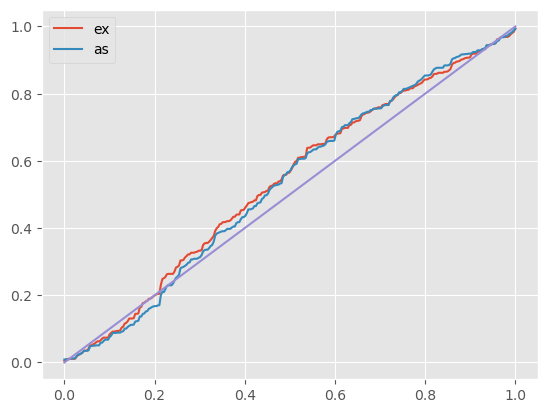

In [40]:
def anderson_norm_value(sample, n):
    sample = np.array(sample)
    sample = np.sort(sample)
      
    ans = -n
    for i in range(1, n+1):
        ans -= ((2*i-1)/n*(
            np.log(st.norm(0, 1).cdf(sample[i-1])) + np.log(1 - st.norm(0, 1).cdf(sample[n-i]))
        ))
    
    return ans

def counter(val):
    f = open('anderson.txt', 'r')
    data = f.read()
    data = data.split(" ")
    count = 0
    while float(data[count]) <= val:
        count += 1
        if count >= len(data)-1:
            break
    count /= len(data)
    return count

def counter_as(val):
    f = open('anderson_as.txt', 'r')
    data = f.read()
    data = data.split(" ")
    count = 0
    while float(data[count]) <= val:
        count += 1
        if count >= len(data)-1:
            break
    count /= len(data)
    return count

#График p-val
n = 5
t = np.zeros(300)
v = np.zeros(300)
for i in range(300):
    sample = st.norm(0, 1.1).rvs(size=n)
    t[i] = counter(anderson_norm_value(sample, n))
    v[i] = counter_as(anderson_norm_value(sample, n))

t = np.sort(t)
v = np.sort(v)
plt.plot(np.linspace(0, 1, 300), t, label='ex')
plt.plot(np.linspace(0, 1, 300), v, label='as')
plt.plot(np.linspace(0, 1, 300), np.linspace(0, 1, 300))
plt.legend()